# Rule based Sentiment Analysis
using TextBlob, VADER, SentiWordNet

### Data preprocessing steps
1. Cleaning the text
2. Tokenization
3. Enrichment - POS tagging
4. Stopwords removal
5. Obtaining the stem words

Importing dataset

In [2]:
import pandas as pd

# Creating a pandas dataframe from reviews.txt file
data = pd.read_json('part1.json', lines=True)
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5,Must Read for Life Afficianados,1390003200,"01 18, 2014"
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5,Timeless for every good and bad time in your l...,1317081600,"09 27, 2011"
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5,A Modern Rumi,1033948800,"10 7, 2002"


Dropping unwanted columns

In [3]:
# Dropping Unnamed: 0 column
mydata = pd.DataFrame(data.reviewText)
mydata.head()

# mydata = pd.DataFrame(data.review)

,reviewText
0,Spiritually and mentally inspiring! A book tha...
1,This is one my must have books. It is a master...
2,This book provides a reflection that you can a...
3,I first read THE PROPHET in college back in th...
4,A timeless classic. It is a very demanding an...


### Step 1: Cleaning the text

In [5]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['reviewText'].apply(clean)
mydata.head()

,reviewText,Cleaned Reviews
0,Spiritually and mentally inspiring! A book tha...,Spiritually and mentally inspiring A book that...
1,This is one my must have books. It is a master...,This is one my must have books It is a masterp...
2,This book provides a reflection that you can a...,This book provides a reflection that you can a...
3,I first read THE PROPHET in college back in th...,I first read THE PROPHET in college back in th...
4,A timeless classic. It is a very demanding an...,A timeless classic It is a very demanding and ...


### Steps 2-4: Tokenization, POS tagging, stopwords removal

In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to /home/ananth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ananth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ananth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviewText,Cleaned Reviews,POS tagged
0,Spiritually and mentally inspiring! A book tha...,Spiritually and mentally inspiring A book that...,"[(Spiritually, r), (mentally, r), (inspiring, ..."
1,This is one my must have books. It is a master...,This is one my must have books It is a masterp...,"[(one, None), (must, None), (books, n), (maste..."
2,This book provides a reflection that you can a...,This book provides a reflection that you can a...,"[(book, n), (provides, v), (reflection, n), (a..."
3,I first read THE PROPHET in college back in th...,I first read THE PROPHET in college back in th...,"[(first, r), (read, v), (PROPHET, n), (college..."
4,A timeless classic. It is a very demanding an...,A timeless classic It is a very demanding and ...,"[(timeless, n), (classic, a), (demanding, n), ..."


### Step 5: Obtaining the stem words

#### Lemmatization

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,reviewText,Cleaned Reviews,POS tagged,Lemma
0,Spiritually and mentally inspiring! A book tha...,Spiritually and mentally inspiring A book that...,"[(Spiritually, r), (mentally, r), (inspiring, ...",Spiritually mentally inspire book allow ques...
1,This is one my must have books. It is a master...,This is one my must have books It is a masterp...,"[(one, None), (must, None), (books, n), (maste...",one must book masterpiece spirituality first...
2,This book provides a reflection that you can a...,This book provides a reflection that you can a...,"[(book, n), (provides, v), (reflection, n), (a...",book provide reflection apply life way try a...
3,I first read THE PROPHET in college back in th...,I first read THE PROPHET in college back in th...,"[(first, r), (read, v), (PROPHET, n), (college...",first read PROPHET college back book revival...
4,A timeless classic. It is a very demanding an...,A timeless classic It is a very demanding and ...,"[(timeless, n), (classic, a), (demanding, n), ...",timeless classic demanding assume title Gibr...


In [9]:
mydata[['reviewText', 'Lemma']]

,reviewText,Lemma
0,Spiritually and mentally inspiring! A book tha...,Spiritually mentally inspire book allow ques...
1,This is one my must have books. It is a master...,one must book masterpiece spirituality first...
2,This book provides a reflection that you can a...,book provide reflection apply life way try a...
3,I first read THE PROPHET in college back in th...,first read PROPHET college back book revival...
4,A timeless classic. It is a very demanding an...,timeless classic demanding assume title Gibr...
...,...,...
51995,Kolko does an excellent job of making the case...,Kolko excellent job make case business regul...
51996,As an Alabama native and a Tuskegee res I like...,Alabama native Tuskegee res like book still ...
51997,I was into this book the first couple of pages...,book first couple page know would enjoy read...
51998,I loved the loving care with which this book w...,love loving care book write horror Tuskegee ...


# Sentiment analysis using TextBlob

In [11]:
!pip3 install textblob

     |████████████████████████████████| 636 kB 3.1 MB/s eta 0:00:01


In [12]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [13]:
fin_data = pd.DataFrame(mydata[['reviewText', 'Lemma']])

In [14]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,reviewText,Lemma,Polarity,Analysis
0,Spiritually and mentally inspiring! A book tha...,Spiritually mentally inspire book allow ques...,0.033333,Positive
1,This is one my must have books. It is a master...,one must book masterpiece spirituality first...,0.090000,Positive
2,This book provides a reflection that you can a...,book provide reflection apply life way try a...,0.142857,Positive
3,I first read THE PROPHET in college back in th...,first read PROPHET college back book revival...,0.216667,Positive
4,A timeless classic. It is a very demanding an...,timeless classic demanding assume title Gibr...,0.216193,Positive


In [ ]:
positives=[]
positives.append(fin_data['Lemma'](0))


In [15]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    45378
Negative     5678
Neutral       944
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f72470703d0>,
 [Text(-1.0131372108787249, 0.42843084848418433, 'Positive'),
  Text(0.987068936738482, -0.48548420584604285, 'Negative'),
  Text(1.347805054116618, -0.07695151783883766, 'Neutral')],
 [Text(-0.5526202968429408, 0.23368955371864597, '87.3%'),
  Text(0.5384012382209901, -0.26480956682511425, '10.9%'),
  Text(0.848617997036389, -0.04845095567630519, '1.8%')])

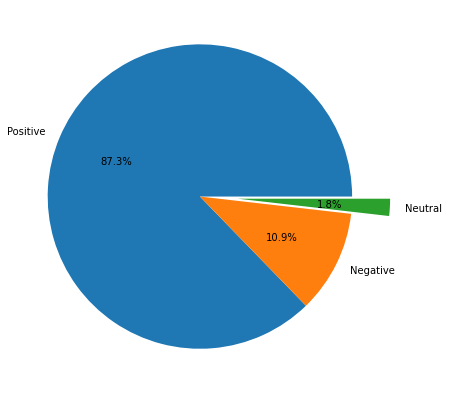

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Sentiment analysis using VADER

In [19]:
!pip3 install vaderSentiment

     |████████████████████████████████| 125 kB 1.8 MB/s eta 0:00:01


In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [21]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,reviewText,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Spiritually and mentally inspiring! A book tha...,Spiritually mentally inspire book allow ques...,0.033333,Positive,0.8074,Positive
1,This is one my must have books. It is a master...,one must book masterpiece spirituality first...,0.090000,Positive,0.8271,Positive
2,This book provides a reflection that you can a...,book provide reflection apply life way try a...,0.142857,Positive,0.4404,Neutral
3,I first read THE PROPHET in college back in th...,first read PROPHET college back book revival...,0.216667,Positive,0.9413,Positive
4,A timeless classic. It is a very demanding an...,timeless classic demanding assume title Gibr...,0.216193,Positive,0.9595,Positive


In [22]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    38393
Neutral      8728
Negative     4879
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7246c84a30>,
 [Text(-0.8168472959189177, 0.8790679695848054, 'Positive'),
  Text(0.4823807246681443, -0.9885893163840263, 'Neutral'),
  Text(1.0525571464195604, -0.319567603991882, 'Negative')],
 [Text(-0.47649425595270195, 0.5127896489244698, '73.8%'),
  Text(0.26311675890989683, -0.5392305362094688, '16.8%'),
  Text(0.5741220798652147, -0.17430960217739017, '9.4%')])

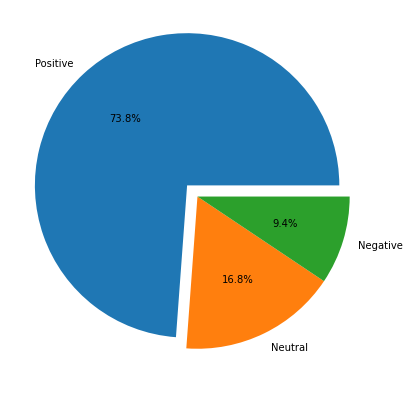

In [23]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Sentiment Analysis using SentiWordNet

In [24]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = mydata['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/ananth/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,reviewText,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Spiritually and mentally inspiring! A book tha...,Spiritually mentally inspire book allow ques...,0.033333,Positive,0.8074,Positive,Positive
1,This is one my must have books. It is a master...,one must book masterpiece spirituality first...,0.090000,Positive,0.8271,Positive,Positive
2,This book provides a reflection that you can a...,book provide reflection apply life way try a...,0.142857,Positive,0.4404,Neutral,Positive
3,I first read THE PROPHET in college back in th...,first read PROPHET college back book revival...,0.216667,Positive,0.9413,Positive,Positive
4,A timeless classic. It is a very demanding an...,timeless classic demanding assume title Gibr...,0.216193,Positive,0.9595,Positive,Positive


In [25]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    40647
Negative     9871
Neutral      1467
0              15
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7239ac0fa0>,
 [Text(-0.8512382544373757, 0.6967018258784814, 'Positive'),
  Text(0.7855323487892335, -0.770025278160185, 'Negative'),
  Text(1.0955042344536086, -0.0993502505996488, 'Neutral'),
  Text(1.0999995482727711, -0.0009968950293662317, '0')],
 [Text(-0.4643117751476594, 0.3800191777518989, '78.2%'),
  Text(0.4284721902486728, -0.42001378808737355, '19.0%'),
  Text(0.5975477642474228, -0.05419104578162661, '2.8%'),
  Text(0.5999997536033297, -0.0005437609251088536, '0.0%')])

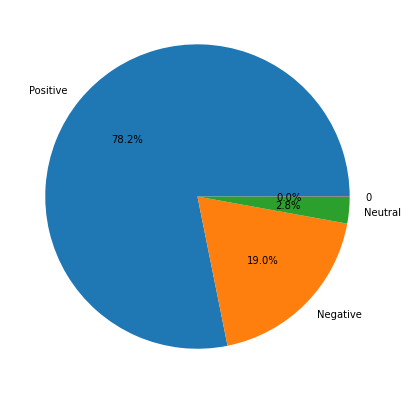

In [29]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = None, autopct='%1.1f%%', shadow=False)
# plt.legend()

# Visual representation of TextBlob, VADER, SentiWordNet results

([<matplotlib.patches.Wedge at 0x7f72398fce50>,
 [Text(-0.8512382544373757, 0.6967018258784814, 'Positive'),
  Text(0.7855323487892335, -0.770025278160185, 'Negative'),
  Text(1.0955042344536086, -0.0993502505996488, 'Neutral'),
  Text(1.0999995482727711, -0.0009968950293662317, '0')],
 [Text(-0.4643117751476594, 0.3800191777518989, '78.2%'),
  Text(0.4284721902486728, -0.42001378808737355, '19.0%'),
  Text(0.5975477642474228, -0.05419104578162661, '2.8%'),
  Text(0.5999997536033297, -0.0005437609251088536, '0.0%')])

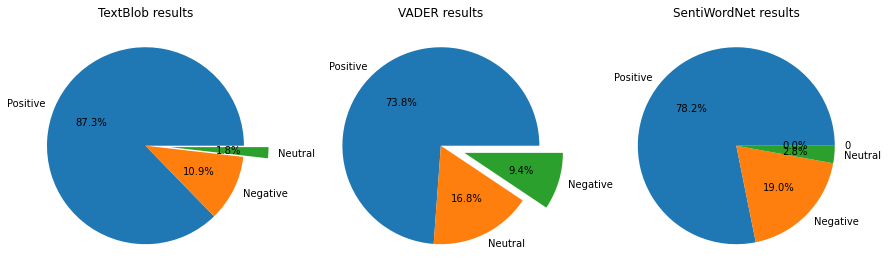

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = None, autopct='%1.1f%%', shadow=False)